In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

In [22]:
data = pd.read_csv("Instagram data.csv", encoding = "latin1")

In [23]:
data

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,13700,5185,3041,5352,77,573,2,38,373,73,80,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...
115,5731,1923,1368,2266,65,135,4,1,148,20,18,Clustering is a machine learning technique use...,#machinelearning #machinelearningalgorithms #d...
116,4139,1133,1538,1367,33,36,0,1,92,34,10,Clustering music genres is a task of grouping ...,#machinelearning #machinelearningalgorithms #d...
117,32695,11815,3147,17414,170,1095,2,75,549,148,214,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...


In [24]:
for column in data:
    print("coloumn name:", column, "- missing values", data[column].isnull().sum())
    print("----------------------------------------------------------------------")

coloumn name: Impressions - missing values 0
----------------------------------------------------------------------
coloumn name: From Home - missing values 0
----------------------------------------------------------------------
coloumn name: From Hashtags - missing values 0
----------------------------------------------------------------------
coloumn name: From Explore - missing values 0
----------------------------------------------------------------------
coloumn name: From Other - missing values 0
----------------------------------------------------------------------
coloumn name: Saves - missing values 0
----------------------------------------------------------------------
coloumn name: Comments - missing values 0
----------------------------------------------------------------------
coloumn name: Shares - missing values 0
----------------------------------------------------------------------
coloumn name: Likes - missing values 0
-----------------------------------------------

In [37]:
# Extract list of columns
data_cols = list(data.columns)
print('Dataset columns: {}'.format(data_cols))

Dataset columns: ['Impressions', 'From Home', 'From Hashtags', 'From Explore', 'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits', 'Follows', 'Caption', 'Hashtags']


In [45]:
data_columns = pd.DataFrame(data, columns = data_cols)

In [34]:
# Define the number of bootstrap samples you want
#n_samples = 5  # Adjust as needed

# Function to perform bootstrapping

#def bootstrap_data(df, n_samples):
    #bootstrap_samples = []
    #for i in range(n_samples):
        #sample_indices = np.random.choice(data.index, size=len(data), replace=True)
        #bootstrap_sample = data.iloc[sample_indices]
        #bootstrap_samples.append(bootstrap_sample)
    #return bootstrap_samples
 

# Perform bootstrapping
#bootstrap_samples = bootstrap_data(data_columns, n_samples)

#first_bootstrap_sample = bootstrap_samples[0]
#first_bootstrap_sample

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
113,10206,2371,1624,6000,117,182,10,17,172,237,100,Practice these 90+ Data Science Projects For B...,#datascience #datasciencejobs #datasciencetrai...
71,3525,1323,1699,182,292,33,5,0,96,26,4,You must have seen the news divided into categ...,#data #datascience #dataanalysis #dataanalytic...
50,2998,1945,794,84,139,42,4,1,126,31,10,Time series analysis means analyzing and findi...,#timeseries #time #statistics #datascience #bi...
94,4082,2195,1248,541,36,135,11,5,175,19,6,Deep learning is a subset of machine learning ...,#deeplearning #machinelearning #artificialinte...
50,2998,1945,794,84,139,42,4,1,126,31,10,Time series analysis means analyzing and findi...,#timeseries #time #statistics #datascience #bi...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,3454,1663,1284,166,234,38,0,0,107,45,8,Here you will learn how to visualize the linea...,#data #datascience #dataanalysis #dataanalytic...
115,5731,1923,1368,2266,65,135,4,1,148,20,18,Clustering is a machine learning technique use...,#machinelearning #machinelearningalgorithms #d...
113,10206,2371,1624,6000,117,182,10,17,172,237,100,Practice these 90+ Data Science Projects For B...,#datascience #datasciencejobs #datasciencetrai...
87,3630,1747,1693,72,86,137,4,10,137,14,4,Here are some of the best data analysis projec...,#data #datascience #dataanalysis #dataanalytic...


In [47]:
n_samples = 20

def bootstrap_data(df, n_samples):
    bootstrap_samples = []
    for i in range(n_samples):
        bootstrap_sample = pd.DataFrame()
        for column in df.columns:
            sample = df[column].sample(n=len(df), replace=True).reset_index(drop=True)
            bootstrap_sample[column] = sample
        bootstrap_samples.append(bootstrap_sample)
    return bootstrap_samples

bootstrap_samples = bootstrap_data(data_columns, n_samples)

first_bootstrap_sample = bootstrap_samples[0]

print(first_bootstrap_sample.head())



   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3169       1711           2986           468         108    182   
1         4239       3050            278           492          75    111   
2         4021       1466            621            45          46     36   
3         2191       2085            707          5762          34     55   
4         3246       1975            694            84         794    139   

   Comments  Shares  Likes  Profile Visits  Follows  \
0        19       4    203               8        4   
1        17      12    244             237       94   
2         5       9     91              21       30   
3         5       2    160              34        0   
4         5       9     72              21       12   

                                             Caption  \
0  Natural language processing or NLP is a subfie...   
1  The introduction of online payment systems has...   
2  Visualizing data is one of the most

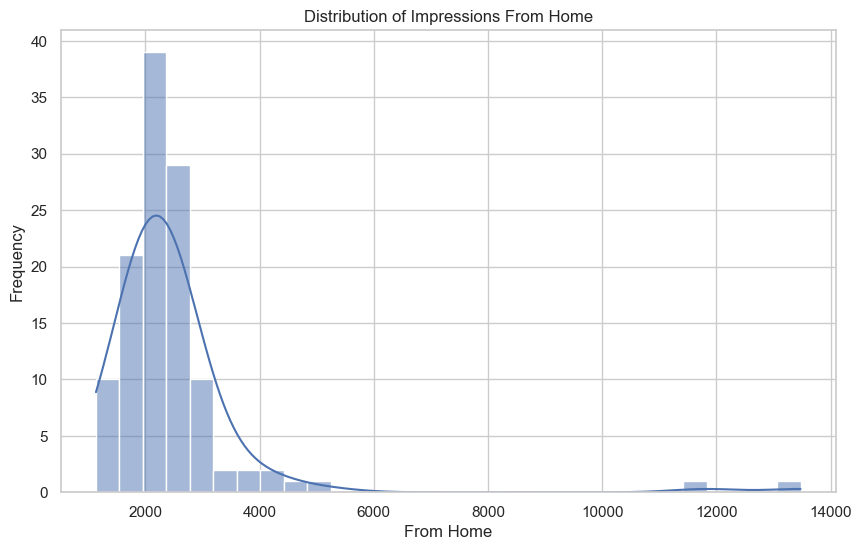

In [ ]:
sb.set(style="whitegrid")

# Function to plot distribution for a given column
def plot_distribution(data, column_name, title):
    plt.figure(figsize=(10, 6))
    sb.histplot(data[column_name], kde=True, bins=30)
    plt.title(title)
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()

# Plotting distributions for each column
plot_distribution(data, 'From Home', 'Distribution of Impressions From Home')

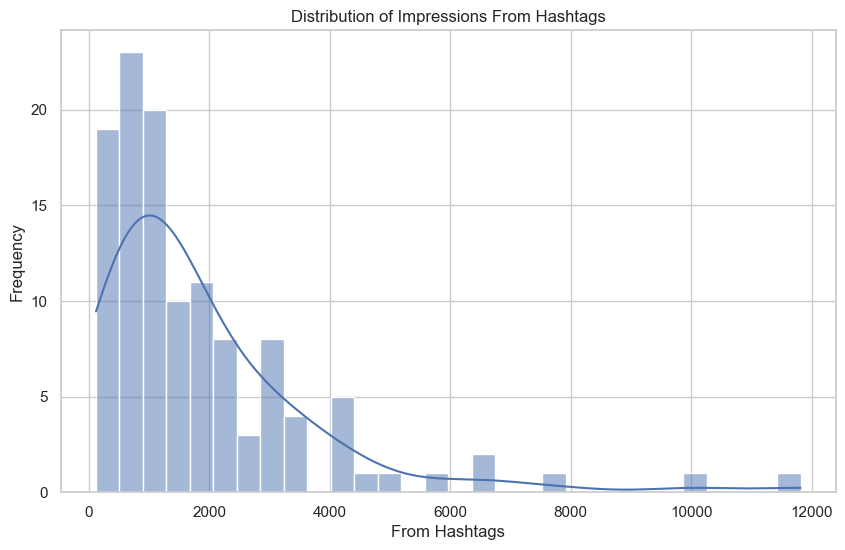

In [ ]:
# Plotting distribution for "From Hashtags"
plot_distribution(data, 'From Hashtags', 'Distribution of Impressions From Hashtags')

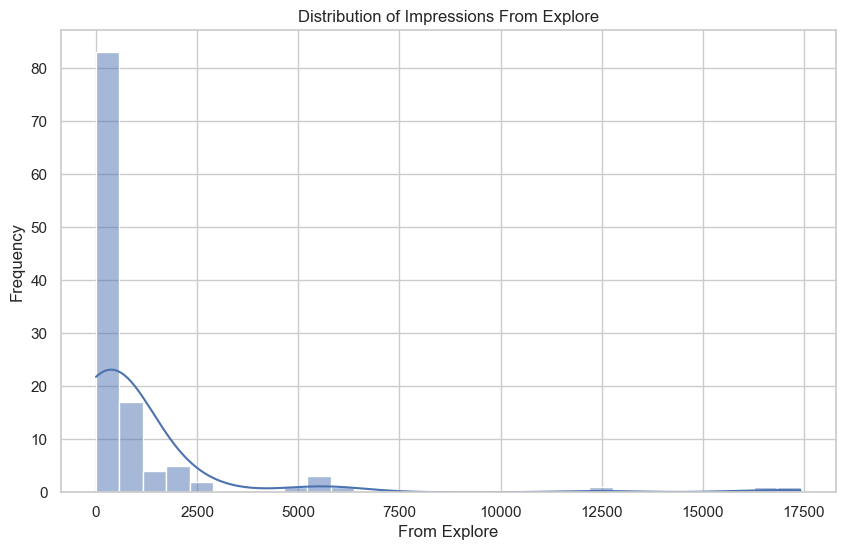

In [ ]:
# Plotting distribution for "From Explore"
plot_distribution(data, 'From Explore', 'Distribution of Impressions From Explore')

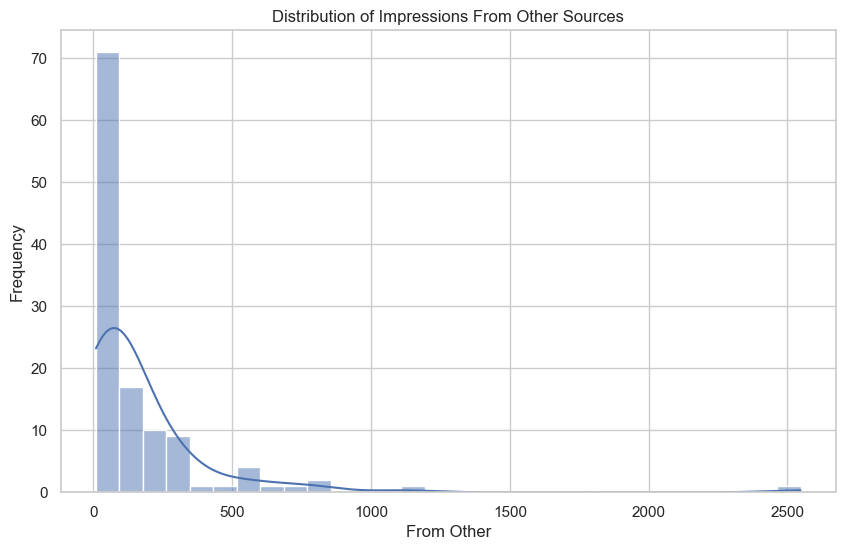

In [ ]:
# Plotting distribution for "From Other"
plot_distribution(data, 'From Other', 'Distribution of Impressions From Other Sources')

In [ ]:
home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

labels = ['From Home','From Hashtags','From Explore','Other']
values = [home, hashtags, explore, other]

fig = px.pie(data, values=values, names=labels, 
             title='Impressions on Instagram Posts From Various Sources', hole=0.4)
fig.show()